In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('AERO-BirdsEye-Data.csv')
df

,index,NCT,Sponsor,Title,Summary,Start_Year,Start_Month,Phase,Enrollment,Status,Condition
0,0,NCT00003305,Sanofi,A Phase II Trial of Aminopterin in Adults and ...,RATIONALE: Drugs used in chemotherapy use diff...,1997,7,Phase 2,75,Completed,Leukemia
1,1,NCT00003821,Sanofi,Phase II Trial of Aminopterin in Patients With...,RATIONALE: Drugs used in chemotherapy use diff...,1998,1,Phase 2,0,Withdrawn,Endometrial Neoplasms
2,2,NCT00004025,Sanofi,"Phase I/II Trial of the Safety, Immunogenicity...",RATIONALE: Vaccines made from a person's white...,1999,3,Phase 1/Phase 2,36,Unknown status,Melanoma
3,3,NCT00005645,Sanofi,Phase II Trial of ILX295501 Administered Orall...,RATIONALE: Drugs used in chemotherapy use diff...,1999,5,Phase 2,0,Withdrawn,Ovarian Neoplasms
4,4,NCT00008281,Sanofi,"A Multicenter, Open-Label, Randomized, Three-A...",RATIONALE: Drugs used in chemotherapy use diff...,2000,10,Phase 3,0,Unknown status,Colorectal Neoplasms
...,...,...,...,...,...,...,...,...,...,...,...
13743,13743,NCT03726879,Roche,"A Phase III, Randomized, Double-Blind, Placebo...",This study (also known as IMpassion050) will e...,2018,12,Phase 3,224,Recruiting,Breast Neoplasms
13744,13744,NCT03735121,Roche,A Two-Part Phase Ib/II Study to Investigate th...,"This study will evaluate the pharmacokinetics,...",2018,12,Phase 1,245,Recruiting,Lung Neoplasms
13745,13745,NCT03761849,Roche,"A Randomized, Multicenter, Double-Blind, Place...","This study will evaluate the efficacy, safety,...",2018,12,Phase 3,660,Not yet recruiting,Huntington Disease
13746,13746,NCT03762681,Roche,"A Randomized, Placebo-controlled,Observer-blin...","This study is designed to assess the safety, t...",2018,12,Phase 1,75,Not yet recruiting,Hepatitis


In [3]:
df.columns

Index(['index', 'NCT', 'Sponsor', 'Title', 'Summary', 'Start_Year',
       'Start_Month', 'Phase', 'Enrollment', 'Status', 'Condition'],
      dtype='object')

In [4]:
df.head()

,index,NCT,Sponsor,Title,Summary,Start_Year,Start_Month,Phase,Enrollment,Status,Condition
0,0,NCT00003305,Sanofi,A Phase II Trial of Aminopterin in Adults and ...,RATIONALE: Drugs used in chemotherapy use diff...,1997,7,Phase 2,75,Completed,Leukemia
1,1,NCT00003821,Sanofi,Phase II Trial of Aminopterin in Patients With...,RATIONALE: Drugs used in chemotherapy use diff...,1998,1,Phase 2,0,Withdrawn,Endometrial Neoplasms
2,2,NCT00004025,Sanofi,"Phase I/II Trial of the Safety, Immunogenicity...",RATIONALE: Vaccines made from a person's white...,1999,3,Phase 1/Phase 2,36,Unknown status,Melanoma
3,3,NCT00005645,Sanofi,Phase II Trial of ILX295501 Administered Orall...,RATIONALE: Drugs used in chemotherapy use diff...,1999,5,Phase 2,0,Withdrawn,Ovarian Neoplasms
4,4,NCT00008281,Sanofi,"A Multicenter, Open-Label, Randomized, Three-A...",RATIONALE: Drugs used in chemotherapy use diff...,2000,10,Phase 3,0,Unknown status,Colorectal Neoplasms


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

index            0
NCT              0
Sponsor          0
Title          144
Summary          0
Start_Year       0
Start_Month      0
Phase          263
Enrollment       0
Status           0
Condition        0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

index          0
NCT            0
Sponsor        0
Title          0
Summary        0
Start_Year     0
Start_Month    0
Phase          0
Enrollment     0
Status         0
Condition      0
dtype: int64

In [9]:
df.shape

(13368, 11)

In [10]:
df.dtypes

index           int64
NCT            object
Sponsor        object
Title          object
Summary        object
Start_Year      int64
Start_Month     int64
Phase          object
Enrollment      int64
Status         object
Condition      object
dtype: object

In [11]:
df = df.drop(['NCT','Title','Summary'], axis=1)
df.head()

,index,Sponsor,Start_Year,Start_Month,Phase,Enrollment,Status,Condition
0,0,Sanofi,1997,7,Phase 2,75,Completed,Leukemia
1,1,Sanofi,1998,1,Phase 2,0,Withdrawn,Endometrial Neoplasms
2,2,Sanofi,1999,3,Phase 1/Phase 2,36,Unknown status,Melanoma
3,3,Sanofi,1999,5,Phase 2,0,Withdrawn,Ovarian Neoplasms
4,4,Sanofi,2000,10,Phase 3,0,Unknown status,Colorectal Neoplasms


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [13]:
df.dtypes

index          int64
Sponsor        int64
Start_Year     int64
Start_Month    int64
Phase          int64
Enrollment     int64
Status         int64
Condition      int64
dtype: object

In [14]:
df.head()

,index,Sponsor,Start_Year,Start_Month,Phase,Enrollment,Status,Condition
0,0,9,1997,7,3,75,1,438
1,1,9,1998,1,3,0,8,246
2,2,9,1999,3,2,36,7,491
3,3,9,1999,5,3,0,8,591
4,4,9,2000,10,5,0,7,163


In [15]:
df.corr()

,index,Sponsor,Start_Year,Start_Month,Phase,Enrollment,Status,Condition
index,1.000000,-0.580084,0.193951,-0.000406,-0.079327,-0.024829,-0.021024,-0.022315
Sponsor,-0.580084,1.000000,-0.091156,0.004317,0.113457,0.001455,0.031425,-0.059678
Start_Year,0.193951,-0.091156,1.000000,-0.019623,-0.186439,-0.054427,0.181196,0.004360
Start_Month,-0.000406,0.004317,-0.019623,1.000000,-0.006071,0.015678,0.004183,0.002099
Phase,-0.079327,0.113457,-0.186439,-0.006071,1.000000,0.146805,-0.033718,-0.027791
Enrollment,-0.024829,0.001455,-0.054427,0.015678,0.146805,1.000000,-0.041051,0.011021
Status,-0.021024,0.031425,0.181196,0.004183,-0.033718,-0.041051,1.000000,-0.038654
Condition,-0.022315,-0.059678,0.004360,0.002099,-0.027791,0.011021,-0.038654,1.000000


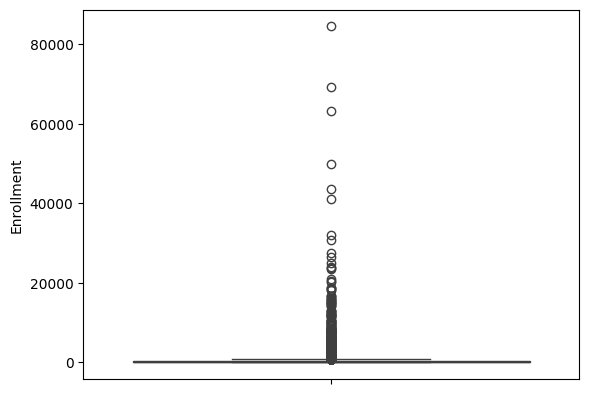

In [16]:
import seaborn as sns
sns.boxplot(df['Enrollment'])
plt.xticks(rotation=30)
plt.show()

In [17]:
Q1 = df['Enrollment'].quantile(0.25)
Q3 = df['Enrollment'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Enrollment'] >= lower_limit) & (df['Enrollment'] <= upper_limit)]


<Axes: ylabel='Enrollment'>

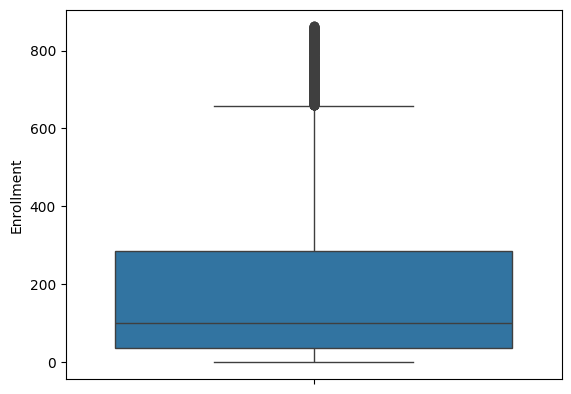

In [18]:
sns.boxplot(df['Enrollment'])

In [19]:
X = df.drop('Status', axis=1)
y = df['Status']
X.shape,y.shape
print(X.columns)

Index(['index', 'Sponsor', 'Start_Year', 'Start_Month', 'Phase', 'Enrollment',
       'Condition'],
      dtype='object')


In [20]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(

    X, y,

    test_size=0.2,

    random_state=42

)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)



X_train shape: (9754, 7)
X_test shape: (2439, 7)


In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [22]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)



Accuracy: 0.7515375153751538


In [23]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       109
           1       0.75      1.00      0.86      1833
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00       144
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00       249
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00        65

    accuracy                           0.75      2439
   macro avg       0.08      0.11      0.10      2439
weighted avg       0.56      0.75      0.64      2439



In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(

    n_estimators=100,

    random_state=42

)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.8327183271832719


In [25]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

scores = cross_val_score(
    xgb,
    X,
    y,
    cv=25,
    scoring='accuracy'
)

print("Cross Validation Scores:", scores)
print("Average Accuracy:", scores.mean())



Cross Validation Scores: [0.77459016 0.69467213 0.50204918 0.75819672 0.69672131 0.38934426
 0.39139344 0.59221311 0.67827869 0.46516393 0.33401639 0.5204918
 0.43852459 0.60655738 0.62704918 0.80327869 0.74385246 0.69877049
 0.77207392 0.58726899 0.60985626 0.80903491 0.50102669 0.79055441
 0.43737166]
Average Accuracy: 0.608894031709698


In [26]:
xgb_final = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

xgb_final.fit(X, y)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [27]:
# Take 5 real samples for testing
sample_test = X.sample(5, random_state=1)

# Expected output
expected_output = y.loc[sample_test.index]

print("Test Inputs:")
print(sample_test)

print("\nExpected Output:")
print(expected_output)

Test Inputs:
       index  Sponsor  Start_Year  Start_Month  Phase  Enrollment  Condition
6197    6197        5        2015            3      1          35        556
9916    9916        2        2008            5      1          30        507
10391  10391        1        2011            3      3         111        247
8931    8931        2        2012            1      5         250        585
12082  12082        4        2015           11      5         225        528

Expected Output:
6197     1
9916     1
10391    1
8931     1
12082    4
Name: Status, dtype: int64


In [28]:
import joblib

joblib.dump(xgb_final, "model1.pkl")


['model1.pkl']

In [29]:
import pandas as pd
import joblib

# Load model
model = joblib.load("model1.pkl")

# decoding map
status_map = {
    0: "Completed",
    1: "Terminated",
    2: "Withdrawn",
    3: "Suspended",
    4: "Recruiting"
}

# ===== ENTER YOUR TEST VALUES HERE =====

index = 12082
sponsor = 4
start_year = 2015
start_month = 11
phase = 5
enrollment = 225
condition = 528

# Create dataframe
input_data = pd.DataFrame([{
    "index": index,
    "Sponsor": sponsor,
    "Start_Year": start_year,
    "Start_Month": start_month,
    "Phase": phase,
    "Enrollment": enrollment,
    "Condition": condition
}])

# Predict
prediction = model.predict(input_data)[0]

print("Encoded Prediction:", prediction)
print("Decoded Prediction:", status_map[prediction])

Encoded Prediction: 0
Decoded Prediction: Completed
